In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
def fetch_mpe(y_true, y_pred):
    mpe = np.mean((y_true - y_pred) / y_true) * 100
    return mpe

In [3]:
data = pd.read_csv("C://Users/User/Desktop/UOW/DataScience/Assignment/Laptop_rank/Cleaned_dataset.csv")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.2f}'.format

# Step 4 Decide Independent Features and Dependent Feature

In [4]:
x = data.drop(columns=['Price(RM)'])
y = data['Price(RM)']

In [5]:
x

,Type,Dedicated Graphic Memory Capacity,SSD,RAM (in GB),Expandable Memory,Touchscreen,Screen Size (in inch),screen_resolution,Storage,CPU_ranking,gpu_benchmark,ram_type_tokenized,Refresh_Rate
0,1,8.00,1,32,1,0,17.30,1440,1000,4,168.00,7,1
1,1,8.00,1,32,1,0,15.60,1440,1000,4,168.00,7,1
2,1,4.00,1,16,0,0,16.10,1080,512,64,72.60,4,1
3,1,4.00,1,16,0,0,15.60,1080,512,24,72.60,4,1
4,2,0.00,1,16,0,1,14.00,1080,512,108,4.23,4,1
5,2,0.00,1,16,0,0,14.00,1080,512,61,17.50,4,1
6,2,0.00,1,4,0,0,15.60,1080,256,745,4.23,4,1
7,3,0.00,1,16,0,1,13.30,1080,1000,24,102.00,4,1
8,1,4.00,1,8,1,0,15.60,1080,1000,187,59.90,4,2
9,2,0.00,1,8,1,0,15.60,1080,256,674,5.05,4,1


# Step 5 Data Spliting(70/30)

In [6]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x, y, test_size=0.3,  random_state = 3)

In [35]:
a = 1

# Step 6 Start Training Model (Linear Regression)

In [36]:
model = Lasso(alpha=a)
model.fit(X_train1, Y_train1)
model_pred_test = model.predict(X_test1)

# Step 6.1 Accuracy (70/30)

# MSE

In [37]:
mse = mean_squared_error(Y_test1, model_pred_test)

# RMSE

In [38]:
rmse = (np.sqrt(mean_squared_error(Y_test1, model_pred_test)))

# MAE

In [39]:
mae = mean_absolute_error(Y_test1, model_pred_test)

# MAPE

In [40]:
mape = mean_absolute_percentage_error(Y_test1, model_pred_test)

# MPE

In [41]:
mpe = 0.0
mpe = fetch_mpe(Y_test1, model_pred_test)

# Step 6.2 Show Accuracy results (70/30)

In [42]:
scoring_results = [
    {'Gradient Boosting Regression': 'MSE', 'Value': mse},
    {'Gradient Boosting Regression': 'RMSE', 'Value': rmse},
    {'Gradient Boosting Regression': 'MAE', 'Value': mae},
    {'Gradient Boosting Regression': 'MAPE', 'Value': mape},
    {'Gradient Boosting Regression': 'MPE', 'Value': mpe},
]
scoring_df = pd.DataFrame(scoring_results)
scoring_df

,Gradient Boosting Regression,Value
0,MSE,1479445.62
1,RMSE,1216.32
2,MAE,660.25
3,MAPE,0.16
4,MPE,-4.52


# Step 7 Predict Result (70/30)

In [43]:
difference = Y_test1 - model_pred_test
difference = difference.abs()
pred_df = pd.DataFrame({'Predicted': model_pred_test, 'Original' : Y_test1, 'Difference' : difference})
pred_df

,Predicted,Original,Difference
193,6419.76,7424.45,1004.69
740,3508.32,3794.45,286.13
58,4424.16,3574.45,849.71
682,2643.90,2254.45,389.45
197,3957.41,3849.45,107.96
633,6777.98,7699.45,921.47
206,1458.55,1484.45,25.90
558,10492.91,8634.45,1858.46
546,3584.29,2749.45,834.84
969,4872.45,13464.06,8591.61


# Plot Result

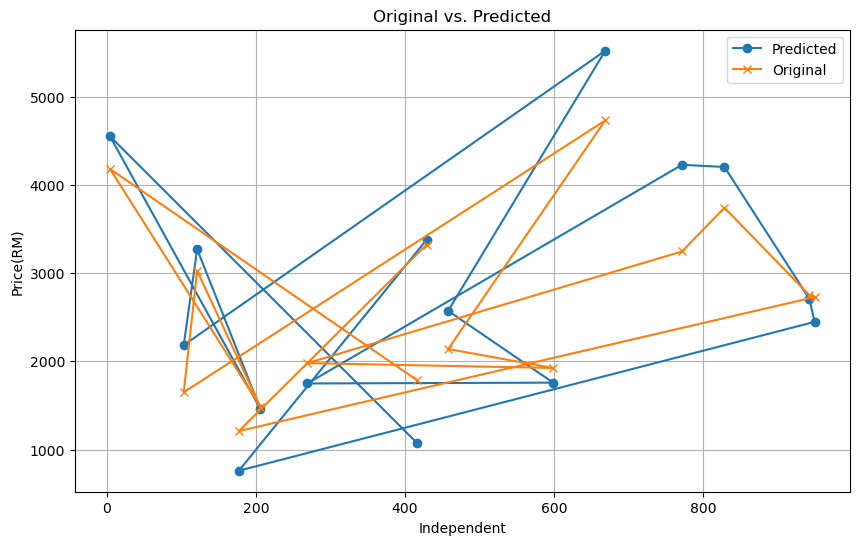

In [44]:
num_random_points = 15  
pred_df = pred_df.sample(n=num_random_points, random_state=4)
plt.figure(figsize=(10, 6))
plt.plot(pred_df.index, pred_df['Predicted'], label='Predicted', marker='o')
plt.plot(pred_df.index, pred_df['Original'], label='Original', marker='x')
plt.xlabel('Independent')
plt.ylabel('Price(RM)')
plt.title('Original vs. Predicted')
plt.legend()
plt.grid(True)
plt.show()

# Step 8 Data Spliting(80/20)

In [45]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(x, y, test_size=0.2,  random_state = 3)

# Step 9 Start Training Model (Gradient Boosting)

In [55]:
model = Lasso(alpha=a)
model.fit(X_train2, Y_train2)
model_pred_test = model.predict(X_test2)

# Step 9.1 Accuracy (80/20)

# MSE

In [56]:
mse = mean_squared_error(Y_test2, model_pred_test)

# RMSE

In [57]:
rmse = (np.sqrt(mean_squared_error(Y_test2, model_pred_test)))

# MAE

In [58]:
mae = mean_absolute_error(Y_test2, model_pred_test)

# MAPE

In [59]:
mape = mean_absolute_percentage_error(Y_test2, model_pred_test)

# MPE

In [60]:
mpe = fetch_mpe(Y_test2, model_pred_test)

# Step 9.2 Show Accuracy results (80/20)

In [61]:
scoring_results = [
    {'Gradient Boosting Regression': 'MSE', 'Value': mse},
    {'Gradient Boosting Regression': 'RMSE', 'Value': rmse},
    {'Gradient Boosting Regression': 'MAE', 'Value': mae},
    {'Gradient Boosting Regression': 'MAPE', 'Value': mape},
    {'Gradient Boosting Regression': 'MPE', 'Value': mpe},
]
scoring_df = pd.DataFrame(scoring_results)
scoring_df

,Gradient Boosting Regression,Value
0,MSE,1777285.45
1,RMSE,1333.15
2,MAE,699.58
3,MAPE,0.18
4,MPE,-3.71


# Step 10 Predict Result (80/20)

In [62]:
difference = Y_test2 - model_pred_test
difference = difference.abs()
pred_df = pd.DataFrame({'Predicted': model_pred_test, 'Original' : Y_test2, 'Difference' : difference})
pred_df

,Predicted,Original,Difference
193,6531.10,7424.45,893.35
740,3574.21,3794.45,220.24
58,4451.49,3574.45,877.04
682,2599.16,2254.45,344.71
197,3947.82,3849.45,98.37
633,6902.82,7699.45,796.63
206,1480.37,1484.45,4.08
558,10649.35,8634.45,2014.90
546,3552.79,2749.45,803.34
969,4823.62,13464.06,8640.44


# Plot result

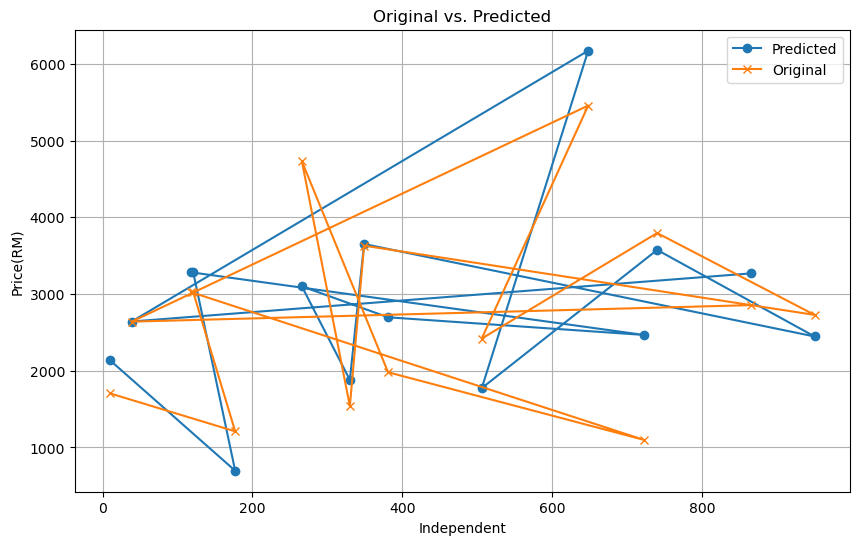

In [63]:
num_random_points = 15  
pred_df = pred_df.sample(n=num_random_points, random_state=4)
plt.figure(figsize=(10, 6))
plt.plot(pred_df.index, pred_df['Predicted'], label='Predicted', marker='o')
plt.plot(pred_df.index, pred_df['Original'], label='Original', marker='x')
plt.xlabel('Independent')
plt.ylabel('Price(RM)')
plt.title('Original vs. Predicted')
plt.legend()
plt.grid(True)
plt.show()